Urban areas in general see a greater number of Pyber rides but also have lower average fares. Rural areas in contrast have the lowest number of rides and the highest fares.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame

# File to Load (Remember to change these)
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
city_ride_data = pd.merge(ride_data,city_data,how='inner',on='city')

In [3]:
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [5]:
group_city = city_ride_data.groupby('city')
fare_by_city = round(group_city['fare'].mean(),0)

In [6]:
fare_by_city.head()

city
Amandaburgh      25.0
Barajasview      25.0
Barronchester    36.0
Bethanyland      33.0
Bradshawfurt     40.0
Name: fare, dtype: float64

In [7]:
rides_per_city = group_city['ride_id'].count()
rides_per_city.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [8]:
drivers_per_city = group_city['driver_count'].sum()


In [9]:
total_drivers = drivers_per_city// rides_per_city


In [10]:
city_type = city_ride_data.groupby('type')
city_type

In [11]:
chart_data = DataFrame({'Average Fare':fare_by_city, 'Riders Per City': rides_per_city,
                        'Drivers Per City':drivers_per_city})

In [12]:
chart_data.head()

,Average Fare,Riders Per City,Drivers Per City
city,,,
Amandaburgh,25.0,18,216
Barajasview,25.0,22,572
Barronchester,36.0,16,176
Bethanyland,33.0,18,396
Bradshawfurt,40.0,10,70


In [13]:
suburb = city_ride_data[city_ride_data['type']=='Suburban']
rural = city_ride_data[city_ride_data['type']=='Rural']
urban = city_ride_data[city_ride_data['type']=='Urban']



In [14]:
suburban_cities = suburb.groupby('city')
rural_cities = rural.groupby('city')
urban_cities = urban.groupby('city')

In [15]:
suburban_rides = suburban_cities['ride_id'].count()
suburban_drivers = suburban_cities['driver_count'].sum()
suburban_fares = round(suburban_cities['fare'].mean(),0)
suburban_drive = suburban_drivers/suburban_rides

rural_rides = rural_cities['ride_id'].count()
rural_drivers = rural_cities['driver_count'].sum()
rural_fares = round(rural_cities['fare'].mean(),0)
rural_drive = rural_drivers / rural_rides

urban_rides = urban_cities['ride_id'].count()
urban_drivers = urban_cities['driver_count'].sum()
urban_fares = round(urban_cities['fare'].mean(),0)
urban_drive = urban_drivers/urban_rides


In [16]:
suburban_df = pd.DataFrame({"Average Fare": suburban_fares,
                       "Total Rides": suburban_rides,
                       "Total Drivers": suburban_drive})

rural_df = pd.DataFrame({"Average Fare": rural_fares,
                     "Total Rides": rural_rides,
                     "Total Drivers": rural_drive})

urban_df = pd.DataFrame({"Average Fare": urban_fares,
                       "Total Rides": urban_rides,
                       "Total Drivers": urban_drive})


In [17]:
sub_size = len(suburban_df['Total Drivers'])
rur_size = len(rural_df['Total Drivers'])
urb_size = len(urban_df['Total Drivers'])

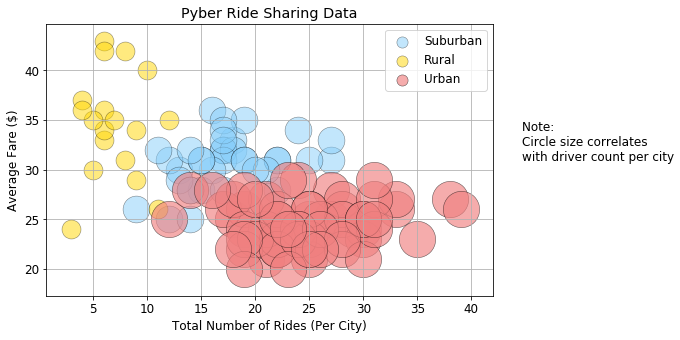

In [34]:
# Bubble Plot
#ChangeBubbleSize = 12
#CBS = ChangeBubbleSize

plt.figure(figsize=(8,5))
suburban_plt = plt.scatter(suburban_df['Total Rides'], suburban_df['Average Fare'], c='lightskyblue', 
label ='Suburban', s=sub_size * 20, alpha = 0.5,linewidths = .5, edgecolor = 'black')



rural_plt = plt.scatter(rural_df['Total Rides'], rural_df['Average Fare'], c='gold', label = 'Rural', 
s= rur_size * 20,linewidths = .5, alpha = 0.5, edgecolor = 'black')



urban_plt = plt.scatter(urban_df['Total Rides'], urban_df['Average Fare'], c = 'lightcoral', 
label = 'Urban', s= urb_size * 20,linewidths = 0.5, alpha = 0.65, edgecolor = 'black')

plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.figtext(.95, .5, "Note: \nCircle size correlates \nwith driver count per city", fontsize=12)
chart_legend = plt.legend(handles=[suburban_plt,rural_plt,urban_plt],fontsize=12)
chart_legend.legendHandles[0]._sizes = [125]
chart_legend.legendHandles[1]._sizes = [125]
chart_legend.legendHandles[2]._sizes = [125]
plt.grid()



plt.savefig("pyberchart.png", bbox_inches = 'tight')


In [19]:
# Show plot
plt.show()

In [20]:
# Pull data for pie charts
by_city_type = city_ride_data.groupby('type')
by_city_types = city_data.groupby('type')



In [21]:
# Pice Chart #1
total_fares = city_ride_data['fare'].sum()
total_grouped = by_city_type['fare'].sum()

grouped_fares_total =   total_grouped / total_fares

In [22]:
grouped_fares_total

type
Rural       0.068115
Suburban    0.304639
Urban       0.627246
Name: fare, dtype: float64

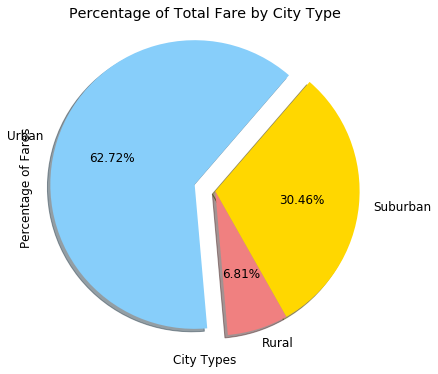

In [23]:
explode = (0, 0, 0.15)
labels = grouped_fares_total.index.tolist()
colors = ['lightcoral', 'gold', 'lightskyblue']
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 12.0
plt.pie(grouped_fares_total, labels = labels, explode = explode, colors = colors, startangle = 275, shadow = True, autopct="%1.2f%%")
plt.axis('equal')
plt.title('Percentage of Total Fare by City Type')
plt.xlabel('City Types')
plt.ylabel('Percentage of Fares')
plt.savefig('pyberpiechart.png', bbox_inches = 'tight')
plt.show()

In [24]:
total_rides = city_ride_data['ride_id'].count()
rides_grouped = by_city_type['ride_id'].count()

percent_ride_total = rides_grouped / total_rides



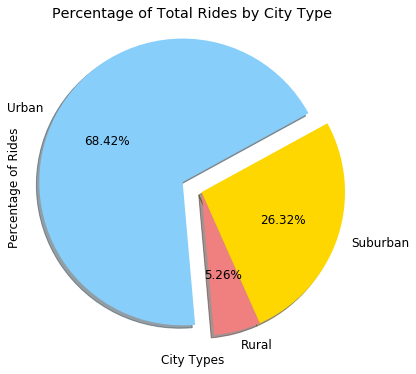

In [25]:
explode = (0, 0, 0.15)
labels = percent_ride_total.index.tolist()
colors = ["lightcoral", "gold", "lightskyblue"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 12.0
plt.pie(percent_ride_total, labels = labels, explode = explode, colors = colors, startangle = 275, shadow = True, autopct="%1.2f%%")
plt.axis("equal")
plt.title("Percentage of Total Rides by City Type")
plt.xlabel("City Types")
plt.ylabel("Percentage of Rides")
plt.savefig("totalridespiechart.png", bbox_inches = 'tight')

In [26]:

total_drivers = city_ride_data['driver_count'].sum()
drivers_grouped = by_city_type['driver_count'].sum()

percent_of_drivers = drivers_grouped / total_drivers

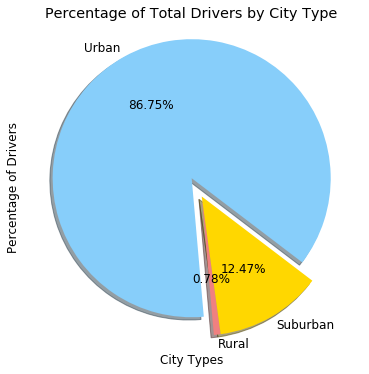

In [27]:
explode = (0, 0, 0.15)
labels = percent_of_drivers.index.tolist()
colors = ["lightcoral", "gold", "lightskyblue"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 12.0
plt.pie(percent_of_drivers, labels = labels, explode = explode, colors = colors, startangle = 275, shadow = True, autopct="%1.2f%%", labeldistance=1.07)
plt.axis("equal")
plt.title("Percentage of Total Drivers by City Type")
plt.xlabel("City Types")
plt.ylabel("Percentage of Drivers")
plt.savefig("totaldriverspiechart.png", bbox_inches = 'tight')
plt.show()

## Total Fares by City Type

In [28]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [29]:
# Show Figure
plt.show()

## Total Rides by City Type

In [30]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [31]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [32]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [33]:
# Show Figure
plt.show()